In [1]:
import pandas as pd
from IPython.display import display, HTML, clear_output
import os
from ipywidgets import interact, widgets
import numpy as np
import matplotlib.pyplot as plt

pd.set_option('display.float_format', '{:.4f}'.format)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

def choose(change):
    file = change['new']
    path = os.path.join(folder, file)
    df = pd.read_csv(path, index_col=False)
    df = add_cols_to_df(df)
    df_to_corr = df.iloc[:, 3:]
    matrix = df_to_corr.corr()
    
    with output:
        clear_output(wait=True)
        display(HTML('<div style="width: 100%; overflow: auto;">'))
        display(HTML('<H3><center>' + os.path.splitext(file)[0]))
        display(matrix.style.background_gradient(cmap='coolwarm'))  # Display the correlation matrix
        display(HTML('</div>'))
        plt.figure(figsize=(10, 8))
        plt.imshow(matrix, cmap='coolwarm', interpolation='nearest')
        plt.colorbar()
        plt.xticks(np.arange(len(df.columns[3:])), df.columns[3:], rotation=90)
        plt.yticks(np.arange(len(df.columns[3:])), df.columns[3:])
        plt.title('Correlation Matrix')
        plt.show()
        

In [2]:
print("Input folder location")
folder = input()
files = os.listdir(folder)
#\output\results

Input folder location
E:\BP\bachelors-thesis-main\output\results


In [3]:
def add_cols_to_df(df):
    df['PROCESSORS'] = None
    df['BASE_CLOCK'] = None
    df['BOOST_CLOCK'] = None
    df['MEMORY_CONFIG'] = None
    df['INTERFACE_WIDTH'] = None
    
    for index, row in df.iterrows():
        gpu_name = row['GPU']
        match gpu_name:
            case "Radeon RX Vega":
                df.at[index, 'PROCESSORS'] = 4096
                df.at[index, 'BASE_CLOCK'] = 1.25
                df.at[index, 'BOOST_CLOCK'] = 1.55
                df.at[index, 'MEMORY_CONFIG'] = 8
                df.at[index, 'INTERFACE_WIDTH'] = 2048
            case "NVIDIA GeForce GTX 1080 Ti":
                df.at[index, 'PROCESSORS'] = 3584
                df.at[index, 'BASE_CLOCK'] = 1.48
                df.at[index, 'BOOST_CLOCK'] = 1.58
                df.at[index, 'MEMORY_CONFIG'] = 11
                df.at[index, 'INTERFACE_WIDTH'] = 352
            case "NVIDIA GeForce RTX 2080 SUPER":
                df.at[index, 'PROCESSORS'] = 3072
                df.at[index, 'BASE_CLOCK'] = 1.65
                df.at[index, 'BOOST_CLOCK'] = 1.82
                df.at[index, 'MEMORY_CONFIG'] = 8
                df.at[index, 'INTERFACE_WIDTH'] = 256
            case "NVIDIA GeForce RTX 3070":
                df.at[index, 'PROCESSORS'] = 5888
                df.at[index, 'BASE_CLOCK'] = 1.50
                df.at[index, 'BOOST_CLOCK'] = 1.73
                df.at[index, 'MEMORY_CONFIG'] = 8
                df.at[index, 'INTERFACE_WIDTH'] = 256
            case "NVIDIA GeForce RTX 3090":
                df.at[index, 'PROCESSORS'] = 10496
                df.at[index, 'BASE_CLOCK'] = 1.40
                df.at[index, 'BOOST_CLOCK'] = 1.70
                df.at[index, 'MEMORY_CONFIG'] = 24
                df.at[index, 'INTERFACE_WIDTH'] = 384
            case "NVIDIA RTX A4000":
                df.at[index, 'PROCESSORS'] = 6144
                df.at[index, 'BASE_CLOCK'] = 0.74
                df.at[index, 'BOOST_CLOCK'] = 1.56
                df.at[index, 'MEMORY_CONFIG'] = 16
                df.at[index, 'INTERFACE_WIDTH'] = 256
    return df


In [4]:
if len(files) > 0:
    selected_file = files[0]
else:
    selected_file = None

output = widgets.Output()
dropdown = widgets.Dropdown(options=files, value=selected_file)
dropdown.observe(choose, names='value')

if selected_file:
    choose({'new': selected_file})

display(dropdown)
display(output)

Dropdown(options=('1Password, agilekeychain.csv', '1Password, cloudkeychain.csv', '3DES(PT=$salt,key=$pass).cs…

Output()

,SPEED_MIN,SPEED_MAX,SPEED_MEAN,SPEED_MEDIAN,UTIL_MIN,UTIL_MAX,UTIL_MEAN,UTIL_MEDIAN,TEMP_MIN,TEMP_MAX,TEMP_MEAN,TEMP_MEDIAN,MEM_USED_MIN,MEM_USED_MAX,MEM_USED_MEAN,MEM_USED_MEDIAN,MEM_UTIL_MIN,MEM_UTIL_MAX,MEM_UTIL_MEAN,MEM_UTIL_MEDIAN,BUS_UTIL_MIN,BUS_UTIL_MAX,BUS_UTIL_MEAN,BUS_UTIL_MEDIAN,PROCESSORS,BASE_CLOCK,BOOST_CLOCK,MEMORY_CONFIG,INTERFACE_WIDTH
SPEED_MIN,1.000000,0.789691,0.879886,0.829175,0.505855,0.421986,0.541449,0.495305,0.606032,0.573462,0.587790,0.580681,-0.255846,-0.156134,-0.164207,-0.150969,-0.282517,-0.186397,-0.225445,-0.208675,0.028932,0.334046,0.371481,0.297405,0.380316,0.022849,0.216658,0.325210,-0.244563
SPEED_MAX,0.789691,1.000000,0.990958,0.997020,0.480879,0.617394,0.649638,0.619711,0.552176,0.638442,0.612609,0.617750,-0.313995,-0.203446,-0.221841,-0.212001,-0.359731,-0.246125,-0.303585,-0.287599,0.039441,0.394268,0.360110,0.232355,0.466028,0.036147,0.271001,0.398081,-0.292799
SPEED_MEAN,0.879886,0.990958,1.000000,0.995390,0.508605,0.622437,0.675527,0.642867,0.588181,0.660503,0.648879,0.648509,-0.329598,-0.206084,-0.222032,-0.212443,-0.368928,-0.241735,-0.301178,-0.284140,0.037466,0.402586,0.387894,0.242886,0.450174,0.027579,0.272115,0.390372,-0.302454
SPEED_MEDIAN,0.829175,0.997020,0.995390,1.000000,0.492807,0.617461,0.664989,0.640202,0.567379,0.648796,0.628881,0.630638,-0.312544,-0.203145,-0.214718,-0.207468,-0.355899,-0.242630,-0.298860,-0.281967,0.041236,0.393115,0.371834,0.238663,0.449308,0.029871,0.266044,0.387220,-0.291523
UTIL_MIN,0.505855,0.480879,0.508605,0.492807,1.000000,0.473170,0.753676,0.614679,0.374020,0.396863,0.385385,0.374199,-0.653361,-0.428819,-0.483927,-0.436528,-0.634742,-0.119021,-0.265409,-0.200962,0.097525,0.740227,0.718182,0.558629,0.119028,0.119474,0.331314,0.191716,-0.748543
UTIL_MAX,0.421986,0.617394,0.622437,0.617461,0.473170,1.000000,0.921626,0.937914,0.242051,0.351291,0.314442,0.318346,-0.078230,0.040727,0.005926,-0.000713,-0.068658,0.115183,0.060544,0.054640,0.026341,0.377358,0.313354,0.181689,-0.007482,0.018544,0.005567,0.012457,-0.146760
UTIL_MEAN,0.541449,0.649638,0.675527,0.664989,0.753676,0.921626,1.000000,0.971114,0.353461,0.439284,0.406349,0.406189,-0.298527,-0.154655,-0.214768,-0.191399,-0.282409,0.041477,-0.072398,-0.037662,0.055200,0.607446,0.549856,0.339093,0.031465,0.057167,0.128421,0.082465,-0.386553
UTIL_MEDIAN,0.495305,0.619711,0.642867,0.640202,0.614679,0.937914,0.971114,1.000000,0.288721,0.377762,0.356037,0.347879,-0.200292,-0.053435,-0.106682,-0.115020,-0.183279,0.071026,-0.002851,0.006378,0.054620,0.537245,0.435183,0.238117,-0.001137,0.040570,0.072144,0.040096,-0.292045
TEMP_MIN,0.606032,0.552176,0.588181,0.567379,0.374020,0.242051,0.353461,0.288721,1.000000,0.934872,0.978042,0.969836,-0.335617,-0.273667,-0.254385,-0.217609,-0.398146,-0.356821,-0.355241,-0.303690,0.081694,0.280123,0.303910,0.290440,0.394091,-0.279390,0.193514,0.414214,-0.278942
TEMP_MAX,0.573462,0.638442,0.660503,0.648796,0.396863,0.351291,0.439284,0.377762,0.934872,1.000000,0.990842,0.991726,-0.396154,-0.301506,-0.301608,-0.271958,-0.447744,-0.309913,-0.351322,-0.304825,0.089716,0.382751,0.360905,0.294480,0.336986,-0.228087,0.260748,0.362957,-0.347122


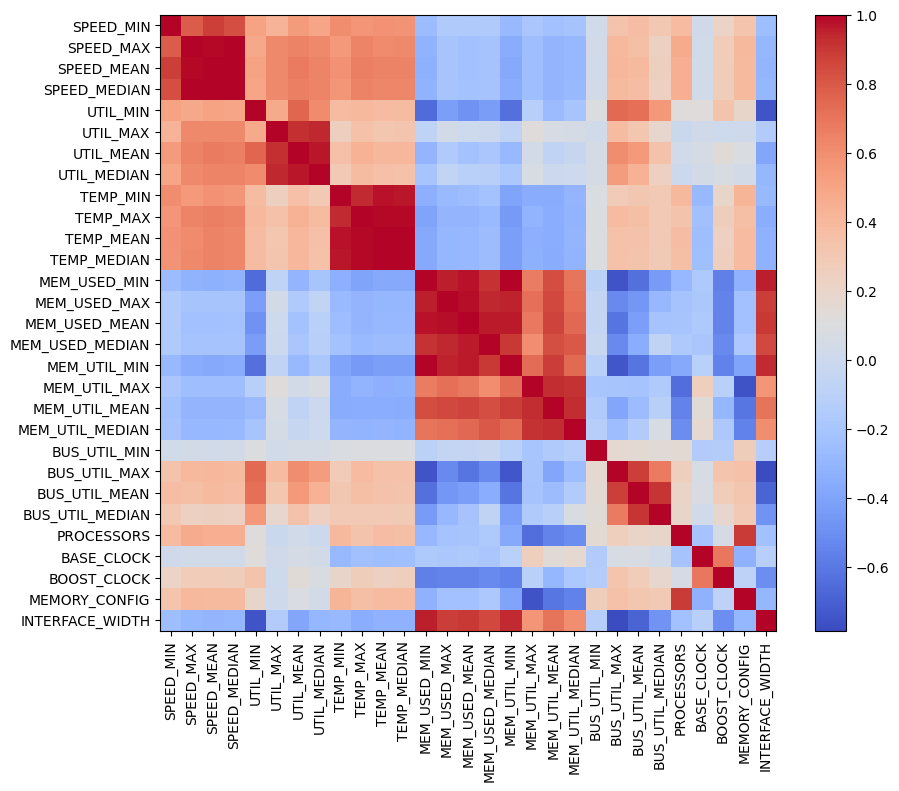

In [5]:
correlations = []
for file in files:
    path = os.path.join(folder, file)
    df = pd.read_csv(path, index_col=False)
    
    mem_cols = ['MEM_USED_MIN', 'MEM_USED_MAX', 'MEM_USED_MEAN', 'MEM_USED_MEDIAN', 'MEM_UTIL_MIN', 'MEM_UTIL_MAX', 'MEM_UTIL_MEAN', 'MEM_UTIL_MEDIAN', 'BUS_UTIL_MIN', 'BUS_UTIL_MAX', 'BUS_UTIL_MEAN', 'BUS_UTIL_MEDIAN']

    for col in mem_cols:
        for i in range(1, len(df)):
            if pd.isna(df.at[i, col]):
                if df.at[i, 'CONFIG'] == df.at[i - 1, 'CONFIG'] and not pd.isna(df.at[i - 1, col]):
                    df.at[i, col] = df.at[i - 1, col]
                else:
                    # Copy the value from the previous row
                    df.at[i, col] = df.at[i - 1, col]
    
    df = add_cols_to_df(df)
    df_to_corr = df.iloc[:, 2:]

    # Fill NaN values with the median of each column
    df_to_corr = df_to_corr.fillna(df_to_corr.median())

    matrix = df_to_corr.corr()
    correlations.append(matrix)

# Convert NaN values to zeros before calculating the median
correlations_with_zeros = np.nan_to_num(np.stack(correlations), nan=0)

median_correlation = np.median(correlations_with_zeros, axis=0)
median_corr_df = pd.DataFrame(median_correlation, columns=df.columns[2:], index=df.columns[2:])
display(median_corr_df.style.background_gradient(cmap='coolwarm'))

plt.figure(figsize=(10, 8))
plt.imshow(median_correlation, cmap='coolwarm', interpolation='nearest')
plt.colorbar()
plt.xticks(np.arange(len(df.columns[2:])), df.columns[2:], rotation=90)
plt.yticks(np.arange(len(df.columns[2:])), df.columns[2:])
plt.title('Median Correlation Matrix')
plt.show()


Median Correlation Matrix for CONFIG: combinator


,SPEED_MIN,SPEED_MAX,SPEED_MEAN,SPEED_MEDIAN,UTIL_MIN,UTIL_MAX,UTIL_MEAN,UTIL_MEDIAN,TEMP_MIN,TEMP_MAX,TEMP_MEAN,TEMP_MEDIAN,MEM_USED_MIN,MEM_USED_MAX,MEM_USED_MEAN,MEM_USED_MEDIAN,MEM_UTIL_MIN,MEM_UTIL_MAX,MEM_UTIL_MEAN,MEM_UTIL_MEDIAN,BUS_UTIL_MIN,BUS_UTIL_MAX,BUS_UTIL_MEAN,BUS_UTIL_MEDIAN,PROCESSORS,BASE_CLOCK,BOOST_CLOCK,MEMORY_CONFIG,INTERFACE_WIDTH
SPEED_MIN,1.000000,0.999455,0.999905,0.999910,0.494301,0.288035,0.412223,0.289683,0.696861,0.666562,0.684965,0.676391,-0.651468,-0.636019,-0.606296,-0.602677,-0.712618,-0.679176,-0.753289,-0.684754,0.000000,0.480257,0.388836,0.308790,0.809745,0.059201,0.462828,0.720347,-0.536728
SPEED_MAX,0.999455,1.000000,0.999814,0.999803,0.489383,0.304851,0.418958,0.304761,0.709499,0.680861,0.694147,0.690919,-0.671792,-0.654883,-0.622016,-0.631612,-0.735239,-0.696444,-0.772840,-0.696365,0.000000,0.498203,0.402013,0.320198,0.804837,0.070791,0.481021,0.717750,-0.547639
SPEED_MEAN,0.999905,0.999814,1.000000,0.999993,0.487243,0.294404,0.422965,0.302986,0.704301,0.676385,0.691102,0.685972,-0.662216,-0.643036,-0.611899,-0.616319,-0.728014,-0.687863,-0.766299,-0.687214,0.000000,0.494167,0.399475,0.319739,0.808431,0.064720,0.471099,0.718184,-0.546420
SPEED_MEDIAN,0.999910,0.999803,0.999993,1.000000,0.488189,0.296812,0.426213,0.303071,0.703511,0.676862,0.691638,0.685284,-0.661809,-0.647716,-0.614363,-0.615977,-0.727151,-0.690774,-0.766962,-0.693848,0.000000,0.495378,0.400350,0.320355,0.808753,0.065268,0.470681,0.720805,-0.545684
UTIL_MIN,0.494301,0.489383,0.487243,0.488189,1.000000,0.833229,0.967349,0.897030,0.419850,0.454119,0.428981,0.423417,-0.906592,-0.747143,-0.755997,-0.734721,-0.842104,-0.240253,-0.444188,-0.258621,0.192268,0.923542,0.812635,0.599288,0.192039,0.133608,0.448167,0.283360,-0.967458
UTIL_MAX,0.288035,0.304851,0.294404,0.296812,0.833229,1.000000,0.957917,0.992514,0.062157,0.085500,0.059446,0.055405,-0.424470,-0.236265,-0.327431,-0.277586,-0.360445,0.020920,-0.056713,0.003867,0.173687,0.585243,0.499084,0.382247,-0.051257,0.100382,0.030352,0.000000,-0.565589
UTIL_MEAN,0.412223,0.418958,0.422965,0.426213,0.967349,0.957917,1.000000,0.991377,0.239653,0.289107,0.266029,0.266472,-0.751933,-0.581500,-0.621865,-0.581937,-0.660995,-0.139222,-0.271924,-0.155388,0.193167,0.832211,0.739973,0.534059,0.040625,0.130388,0.331858,0.182915,-0.868687
UTIL_MEDIAN,0.289683,0.304761,0.302986,0.303071,0.897030,0.992514,0.991377,1.000000,0.102045,0.185254,0.164599,0.147544,-0.510100,-0.350036,-0.394574,-0.339133,-0.435628,0.052336,-0.022538,0.022896,0.162698,0.684986,0.609303,0.421080,-0.107222,0.110042,0.141717,0.000000,-0.683556
TEMP_MIN,0.696861,0.709499,0.704301,0.703511,0.419850,0.062157,0.239653,0.102045,1.000000,0.987228,0.995795,0.995189,-0.666004,-0.660274,-0.649557,-0.627480,-0.747205,-0.632303,-0.743841,-0.604219,0.000000,0.431665,0.307423,0.302750,0.447163,-0.140574,0.545998,0.457192,-0.531057
TEMP_MAX,0.666562,0.680861,0.676385,0.676862,0.454119,0.085500,0.289107,0.185254,0.987228,1.000000,0.997154,0.996407,-0.705770,-0.714274,-0.706293,-0.670470,-0.782047,-0.617673,-0.757877,-0.619776,0.000000,0.494905,0.355567,0.352513,0.398849,-0.150049,0.549907,0.406330,-0.598282


Correlation matrix shape for CONFIG: combinator (29, 29)


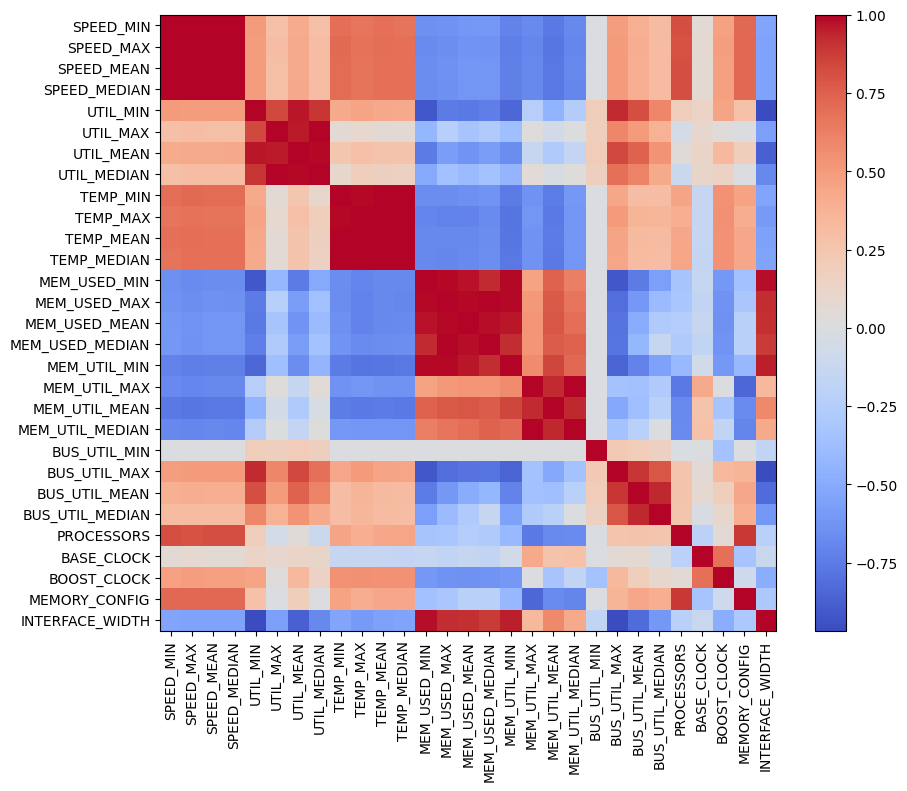

Median Correlation Matrix for CONFIG: dict3


,SPEED_MIN,SPEED_MAX,SPEED_MEAN,SPEED_MEDIAN,UTIL_MIN,UTIL_MAX,UTIL_MEAN,UTIL_MEDIAN,TEMP_MIN,TEMP_MAX,TEMP_MEAN,TEMP_MEDIAN,MEM_USED_MIN,MEM_USED_MAX,MEM_USED_MEAN,MEM_USED_MEDIAN,MEM_UTIL_MIN,MEM_UTIL_MAX,MEM_UTIL_MEAN,MEM_UTIL_MEDIAN,BUS_UTIL_MIN,BUS_UTIL_MAX,BUS_UTIL_MEAN,BUS_UTIL_MEDIAN,PROCESSORS,BASE_CLOCK,BOOST_CLOCK,MEMORY_CONFIG,INTERFACE_WIDTH
SPEED_MIN,1.000000,0.999065,0.999852,0.999865,0.343386,0.000000,0.279707,0.000000,0.381937,0.318503,0.372761,0.371012,-0.523763,-0.233218,-0.158440,-0.185564,-0.610637,-0.417425,-0.389912,-0.380751,0.000000,0.422012,0.402653,0.361325,0.805344,0.035952,0.397723,0.737990,-0.423345
SPEED_MAX,0.999065,1.000000,0.999665,0.999580,0.327441,0.000000,0.292523,0.000000,0.363124,0.321100,0.375863,0.379763,-0.540014,-0.319302,-0.186343,-0.196884,-0.623949,-0.410676,-0.386054,-0.377729,0.000000,0.422946,0.395315,0.345652,0.802221,0.091053,0.424769,0.738742,-0.454250
SPEED_MEAN,0.999852,0.999665,1.000000,0.999986,0.341257,0.000000,0.280588,0.000000,0.374588,0.322922,0.375608,0.371682,-0.530886,-0.276125,-0.165280,-0.194034,-0.616828,-0.414459,-0.393452,-0.389684,0.000000,0.421683,0.395708,0.359324,0.807865,0.040104,0.408986,0.739759,-0.433567
SPEED_MEDIAN,0.999865,0.999580,0.999986,1.000000,0.341915,0.000000,0.282224,0.000000,0.376097,0.321058,0.372795,0.371654,-0.530128,-0.277213,-0.169659,-0.196883,-0.617100,-0.420622,-0.396122,-0.391413,0.000000,0.421740,0.393949,0.358025,0.810588,0.046161,0.404787,0.741466,-0.434488
UTIL_MIN,0.343386,0.327441,0.341257,0.341915,1.000000,0.019036,0.891563,0.245116,0.316683,0.434730,0.403822,0.381179,-0.810793,-0.374636,-0.490736,-0.294576,-0.798153,0.000000,0.000000,0.000000,0.000000,0.699257,0.800207,0.744280,0.000000,0.122486,0.424815,0.205556,-0.842434
UTIL_MAX,0.000000,0.000000,0.000000,0.000000,0.019036,1.000000,0.479452,0.801784,0.000000,0.000000,0.000000,0.000000,0.000000,0.096108,0.044743,0.080778,0.000000,0.000000,0.000000,0.000000,0.000000,0.032455,0.062648,0.089209,0.052616,0.000000,-0.243284,0.160678,0.000000
UTIL_MEAN,0.279707,0.292523,0.280588,0.282224,0.891563,0.479452,1.000000,0.706070,0.203169,0.322712,0.333727,0.315384,-0.706059,-0.120604,-0.341983,-0.120448,-0.649017,0.000000,0.000000,0.000000,0.000000,0.762761,0.782263,0.763963,0.000000,0.071651,0.212079,0.235360,-0.744573
UTIL_MEDIAN,0.000000,0.000000,0.000000,0.000000,0.245116,0.801784,0.706070,1.000000,0.000000,0.000000,0.000000,0.000000,-0.025852,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.311837,0.340377,0.264510,0.000000,0.000000,0.000000,0.078831,-0.054685
TEMP_MIN,0.381937,0.363124,0.374588,0.376097,0.316683,0.000000,0.203169,0.000000,1.000000,0.959432,0.985561,0.983064,-0.397116,0.000000,0.000000,0.000000,-0.510651,-0.113710,-0.151324,-0.095040,0.000000,0.475581,0.334863,0.338488,0.304500,-0.279098,0.000000,0.491838,-0.358497
TEMP_MAX,0.318503,0.321100,0.322922,0.321058,0.434730,0.000000,0.322712,0.000000,0.959432,1.000000,0.991925,0.991150,-0.573986,0.000000,0.000000,0.000000,-0.638735,0.000000,-0.040576,0.000000,0.000000,0.550594,0.477311,0.405503,0.194528,-0.136875,0.131486,0.388156,-0.562519


Correlation matrix shape for CONFIG: dict3 (29, 29)


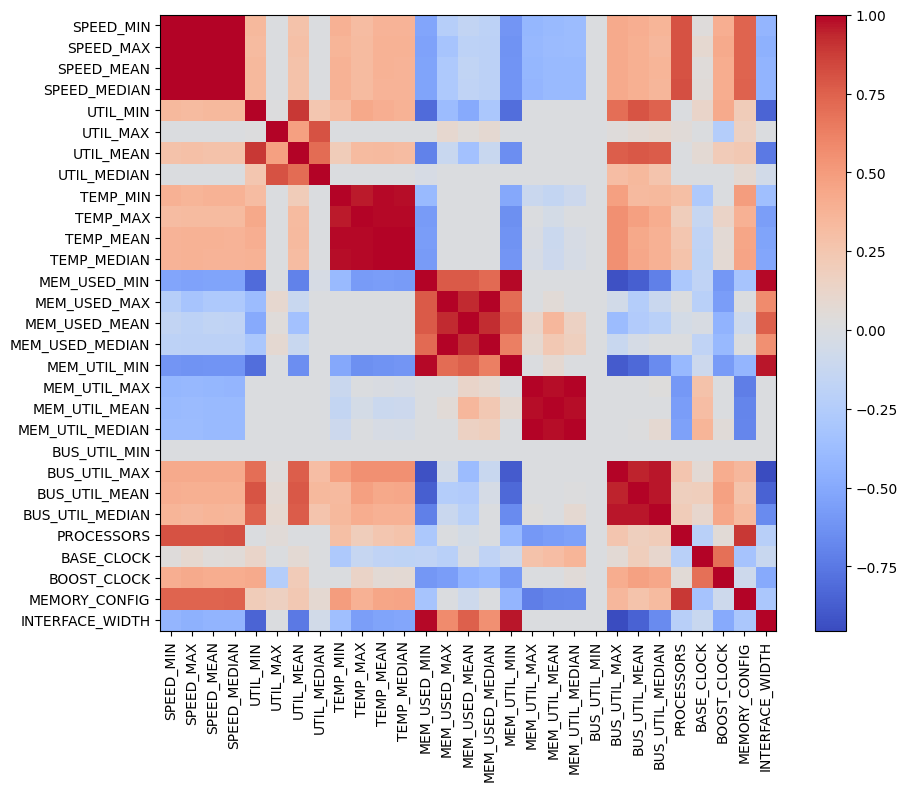

Median Correlation Matrix for CONFIG: dict4


,SPEED_MIN,SPEED_MAX,SPEED_MEAN,SPEED_MEDIAN,UTIL_MIN,UTIL_MAX,UTIL_MEAN,UTIL_MEDIAN,TEMP_MIN,TEMP_MAX,TEMP_MEAN,TEMP_MEDIAN,MEM_USED_MIN,MEM_USED_MAX,MEM_USED_MEAN,MEM_USED_MEDIAN,MEM_UTIL_MIN,MEM_UTIL_MAX,MEM_UTIL_MEAN,MEM_UTIL_MEDIAN,BUS_UTIL_MIN,BUS_UTIL_MAX,BUS_UTIL_MEAN,BUS_UTIL_MEDIAN,PROCESSORS,BASE_CLOCK,BOOST_CLOCK,MEMORY_CONFIG,INTERFACE_WIDTH
SPEED_MIN,1.000000,0.999455,0.999918,0.999923,0.505531,0.061439,0.419130,0.170876,0.344302,0.315072,0.344867,0.344192,-0.571773,-0.486954,-0.498886,-0.490837,-0.625644,-0.572282,-0.621717,-0.572008,0.000000,0.500479,0.472116,0.437199,0.779379,0.166004,0.433463,0.731879,-0.527260
SPEED_MAX,0.999455,1.000000,0.999831,0.999807,0.511163,0.066781,0.426051,0.157670,0.349609,0.324824,0.361678,0.364517,-0.602701,-0.503133,-0.514607,-0.511925,-0.640019,-0.592492,-0.641340,-0.596476,0.000000,0.510777,0.474145,0.441541,0.786063,0.180291,0.449154,0.717937,-0.546331
SPEED_MEAN,0.999918,0.999831,1.000000,0.999991,0.511293,0.069889,0.431274,0.159997,0.348836,0.318858,0.352941,0.359272,-0.602283,-0.496927,-0.510848,-0.501606,-0.638322,-0.591024,-0.630994,-0.593302,0.000000,0.505519,0.474094,0.437514,0.792666,0.167807,0.438772,0.729099,-0.543150
SPEED_MEDIAN,0.999923,0.999807,0.999991,1.000000,0.514899,0.075565,0.425759,0.167305,0.348734,0.317288,0.353123,0.353118,-0.604708,-0.495142,-0.510845,-0.503709,-0.636920,-0.594560,-0.631546,-0.595777,0.000000,0.503854,0.472036,0.438426,0.787236,0.167532,0.437342,0.725934,-0.543731
UTIL_MIN,0.505531,0.511163,0.511293,0.514899,1.000000,0.136390,0.899093,0.566863,0.421131,0.467726,0.468784,0.483172,-0.898296,-0.783407,-0.795097,-0.784110,-0.871076,-0.436212,-0.497318,-0.435540,0.000000,0.941285,0.929015,0.902071,0.163582,0.146201,0.432578,0.274655,-0.919260
UTIL_MAX,0.061439,0.066781,0.069889,0.075565,0.136390,1.000000,0.655848,0.861850,-0.041954,-0.049531,-0.033981,-0.028991,0.241434,0.322093,0.293335,0.322543,0.249316,0.068629,0.123005,0.077949,0.000000,0.022282,0.027174,0.034077,0.021177,0.000000,-0.415557,0.091503,0.202697
UTIL_MEAN,0.419130,0.426051,0.431274,0.425759,0.899093,0.655848,1.000000,0.910648,0.331214,0.437031,0.412858,0.416461,-0.706905,-0.492895,-0.535108,-0.476462,-0.689203,-0.061291,-0.120569,-0.067279,0.000000,0.815396,0.785762,0.758598,0.107502,0.127864,0.188191,0.254631,-0.727991
UTIL_MEDIAN,0.170876,0.157670,0.159997,0.167305,0.566863,0.861850,0.910648,1.000000,-0.053241,-0.066975,-0.064179,-0.056930,-0.088751,-0.065406,-0.075209,-0.040356,-0.055802,-0.002587,-0.030621,0.000000,0.000000,0.395880,0.443382,0.422068,-0.104090,0.101001,-0.169537,0.007442,-0.119593
TEMP_MIN,0.344302,0.349609,0.348836,0.348734,0.421131,-0.041954,0.331214,-0.053241,1.000000,0.980807,0.993670,0.992886,-0.400399,-0.070276,-0.160611,-0.112945,-0.484575,-0.185086,-0.205750,-0.168406,0.000000,0.403323,0.325519,0.327397,0.260582,-0.287579,0.175950,0.454691,-0.365104
TEMP_MAX,0.315072,0.324824,0.318858,0.317288,0.467726,-0.049531,0.437031,-0.066975,0.980807,1.000000,0.995834,0.995527,-0.507717,-0.136818,-0.213164,-0.163363,-0.590957,-0.186270,-0.231171,-0.178603,0.000000,0.440610,0.376867,0.372006,0.221297,-0.232528,0.221332,0.420116,-0.472153


Correlation matrix shape for CONFIG: dict4 (29, 29)


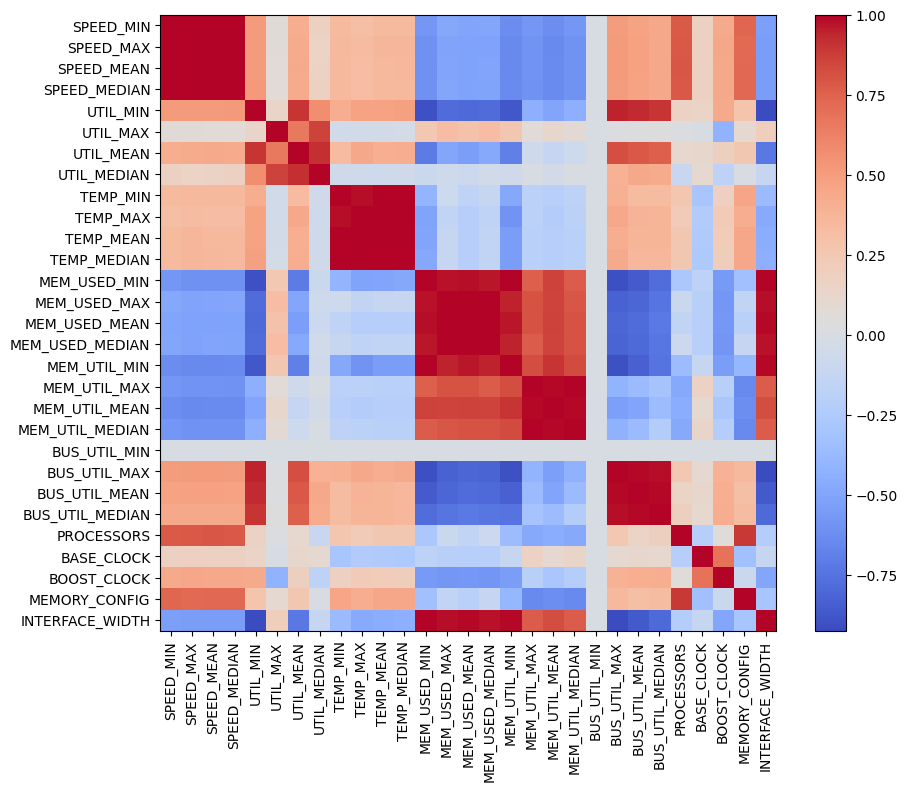

Median Correlation Matrix for CONFIG: force


,SPEED_MIN,SPEED_MAX,SPEED_MEAN,SPEED_MEDIAN,UTIL_MIN,UTIL_MAX,UTIL_MEAN,UTIL_MEDIAN,TEMP_MIN,TEMP_MAX,TEMP_MEAN,TEMP_MEDIAN,MEM_USED_MIN,MEM_USED_MAX,MEM_USED_MEAN,MEM_USED_MEDIAN,MEM_UTIL_MIN,MEM_UTIL_MAX,MEM_UTIL_MEAN,MEM_UTIL_MEDIAN,BUS_UTIL_MIN,BUS_UTIL_MAX,BUS_UTIL_MEAN,BUS_UTIL_MEDIAN,PROCESSORS,BASE_CLOCK,BOOST_CLOCK,MEMORY_CONFIG,INTERFACE_WIDTH
SPEED_MIN,1.000000,0.615897,0.664391,0.658609,0.265984,-0.082571,0.152786,0.000000,0.488049,0.477064,0.498946,0.486053,-0.396841,-0.329631,-0.356665,-0.329712,-0.458767,-0.310977,-0.359535,-0.233220,0.000000,0.300425,0.243956,0.125297,0.480302,0.000000,0.358788,0.360722,-0.359543
SPEED_MAX,0.615897,1.000000,0.992697,0.985785,0.218342,-0.115904,0.199185,0.088003,0.617539,0.629773,0.625293,0.612163,-0.465675,-0.417375,-0.425567,-0.414577,-0.535483,-0.525477,-0.545871,-0.512206,0.000000,0.301446,0.200512,0.017622,0.765867,0.041646,0.493275,0.655642,-0.390490
SPEED_MEAN,0.664391,0.992697,1.000000,0.989992,0.232919,-0.101362,0.228124,0.090046,0.613320,0.634697,0.640049,0.628236,-0.449803,-0.416226,-0.421639,-0.413924,-0.529525,-0.517042,-0.533763,-0.479257,0.000000,0.311769,0.235504,0.060177,0.758734,0.000000,0.457457,0.634555,-0.377565
SPEED_MEDIAN,0.658609,0.985785,0.989992,1.000000,0.232831,-0.094977,0.194826,0.071272,0.625699,0.630606,0.636312,0.637658,-0.468995,-0.420450,-0.421614,-0.418366,-0.528656,-0.524260,-0.540682,-0.501008,0.000000,0.332299,0.208373,0.065420,0.757145,0.000000,0.448279,0.624412,-0.409669
UTIL_MIN,0.265984,0.218342,0.232919,0.232831,1.000000,-0.010279,0.837007,0.479266,0.084343,0.099420,0.081054,0.060916,-0.873487,-0.831238,-0.821468,-0.776606,-0.852772,-0.475577,-0.611658,-0.491848,0.000000,0.831404,0.730199,0.540883,0.177394,0.125960,0.291685,0.254122,-0.887180
UTIL_MAX,-0.082571,-0.115904,-0.101362,-0.094977,-0.010279,1.000000,0.552291,0.609726,-0.286705,-0.376945,-0.345168,-0.339597,0.296588,0.214115,0.237143,0.242210,0.307949,0.046040,0.168251,0.205054,0.000000,-0.138926,-0.078186,-0.043803,-0.036751,-0.140461,-0.479224,-0.024266,0.274081
UTIL_MEAN,0.152786,0.199185,0.228124,0.194826,0.837007,0.552291,1.000000,0.939482,0.007794,0.034817,0.027287,0.018307,-0.635151,-0.581944,-0.584453,-0.564326,-0.607822,-0.297909,-0.439421,-0.298910,0.000000,0.594625,0.600138,0.349534,0.160976,0.048187,0.103275,0.230741,-0.681709
UTIL_MEDIAN,0.000000,0.088003,0.090046,0.071272,0.479266,0.609726,0.939482,1.000000,-0.044161,-0.039355,-0.031261,-0.036070,-0.163925,-0.257915,-0.296698,-0.246876,-0.193304,-0.246382,-0.262969,-0.246845,0.000000,0.296637,0.283070,0.189460,0.097672,0.017534,-0.124977,0.138910,-0.229729
TEMP_MIN,0.488049,0.617539,0.613320,0.625699,0.084343,-0.286705,0.007794,-0.044161,1.000000,0.954551,0.983809,0.981109,-0.320532,-0.255216,-0.236234,-0.241855,-0.417870,-0.565662,-0.531724,-0.480200,0.000000,0.236180,0.185314,0.200893,0.619850,-0.498316,0.131207,0.626276,-0.283508
TEMP_MAX,0.477064,0.629773,0.634697,0.630606,0.099420,-0.376945,0.034817,-0.039355,0.954551,1.000000,0.995245,0.995714,-0.383321,-0.344288,-0.317762,-0.334452,-0.453940,-0.388184,-0.447547,-0.359549,0.000000,0.278686,0.254930,0.283107,0.421106,-0.292601,0.412183,0.440737,-0.340068


Correlation matrix shape for CONFIG: force (29, 29)


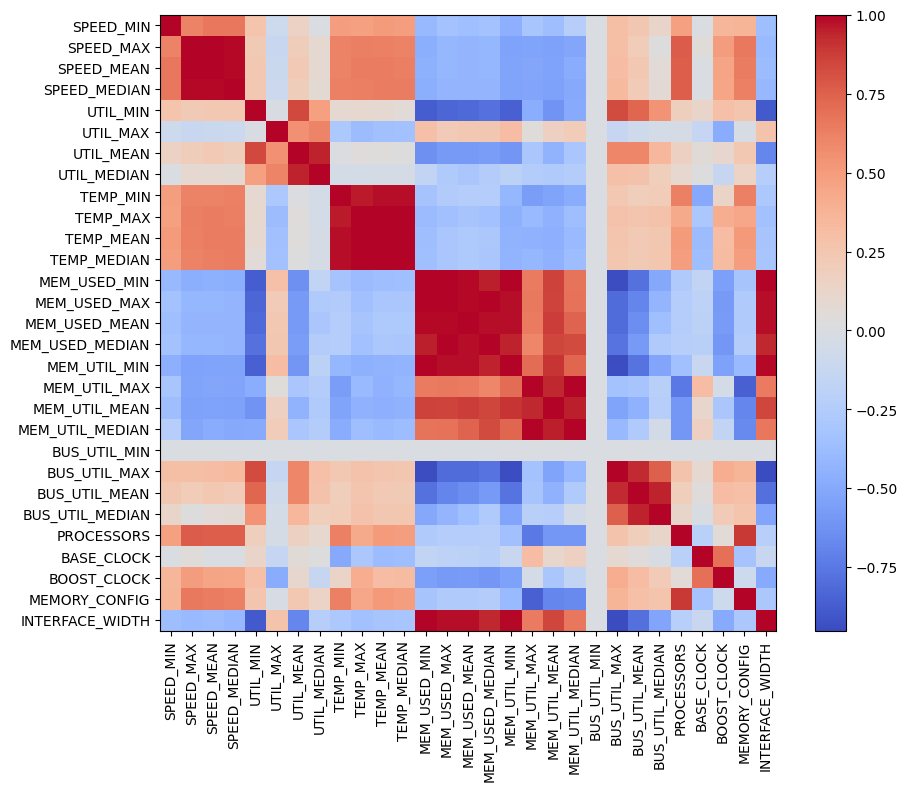

Median Correlation Matrix for CONFIG: hybrid


,SPEED_MIN,SPEED_MAX,SPEED_MEAN,SPEED_MEDIAN,UTIL_MIN,UTIL_MAX,UTIL_MEAN,UTIL_MEDIAN,TEMP_MIN,TEMP_MAX,TEMP_MEAN,TEMP_MEDIAN,MEM_USED_MIN,MEM_USED_MAX,MEM_USED_MEAN,MEM_USED_MEDIAN,MEM_UTIL_MIN,MEM_UTIL_MAX,MEM_UTIL_MEAN,MEM_UTIL_MEDIAN,BUS_UTIL_MIN,BUS_UTIL_MAX,BUS_UTIL_MEAN,BUS_UTIL_MEDIAN,PROCESSORS,BASE_CLOCK,BOOST_CLOCK,MEMORY_CONFIG,INTERFACE_WIDTH
SPEED_MIN,1.000000,0.990814,0.997323,0.995823,0.354618,-0.010722,0.210366,0.001915,0.697147,0.660246,0.671395,0.657782,-0.391509,-0.380911,-0.338534,-0.356292,-0.432433,-0.494690,-0.514196,-0.475129,0.219415,0.293142,0.316910,0.280716,0.784676,-0.008741,0.445379,0.635840,-0.321615
SPEED_MAX,0.990814,1.000000,0.998595,0.999481,0.294190,0.155162,0.201884,0.019897,0.720110,0.727143,0.727194,0.720857,-0.556488,-0.541399,-0.492614,-0.483648,-0.615857,-0.619889,-0.663056,-0.612843,0.332716,0.390778,0.390540,0.364228,0.802530,0.013081,0.509435,0.678701,-0.470366
SPEED_MEAN,0.997323,0.998595,1.000000,0.999753,0.311641,0.104228,0.236707,0.063565,0.737218,0.739085,0.749266,0.744334,-0.540929,-0.515535,-0.484553,-0.473074,-0.602177,-0.597804,-0.639338,-0.597842,0.333289,0.387388,0.390045,0.354950,0.799265,-0.006340,0.502225,0.657061,-0.464870
SPEED_MEDIAN,0.995823,0.999481,0.999753,1.000000,0.297693,0.100377,0.232020,0.114429,0.734145,0.737829,0.741506,0.741260,-0.529923,-0.516470,-0.481743,-0.466413,-0.590734,-0.601305,-0.636865,-0.597335,0.339396,0.373051,0.383739,0.363414,0.800311,0.005909,0.499362,0.668831,-0.452906
UTIL_MIN,0.354618,0.294190,0.311641,0.297693,1.000000,0.359608,0.847990,0.460357,0.358282,0.360124,0.343648,0.342789,-0.793478,-0.684431,-0.727254,-0.673352,-0.774899,-0.246130,-0.538412,-0.440429,0.043603,0.690822,0.644222,0.338535,0.150074,0.122344,0.419575,0.217785,-0.819610
UTIL_MAX,-0.010722,0.155162,0.104228,0.100377,0.359608,1.000000,0.832463,0.966769,-0.022033,-0.008273,-0.034790,-0.042128,-0.486806,-0.437857,-0.461003,-0.436900,-0.459269,-0.204256,-0.327327,-0.277279,0.000000,0.553648,0.428446,0.181966,-0.002611,0.040915,-0.025521,0.073490,-0.550434
UTIL_MEAN,0.210366,0.201884,0.236707,0.232020,0.847990,0.832463,1.000000,0.935306,0.176982,0.217392,0.217518,0.205235,-0.792791,-0.718788,-0.748422,-0.734564,-0.764590,-0.330749,-0.575373,-0.495099,0.033129,0.774766,0.642074,0.326658,0.061430,0.081858,0.299629,0.174273,-0.842084
UTIL_MEDIAN,0.001915,0.019897,0.063565,0.114429,0.460357,0.966769,0.935306,1.000000,0.000000,0.024473,0.010576,0.000000,-0.473317,-0.432290,-0.459616,-0.452439,-0.464661,-0.123473,-0.282150,-0.188000,0.000000,0.548405,0.426287,0.170194,-0.082049,0.042529,0.030970,0.005021,-0.565248
TEMP_MIN,0.697147,0.720110,0.737218,0.734145,0.358282,-0.022033,0.176982,0.000000,1.000000,0.983540,0.994998,0.995416,-0.477574,-0.464997,-0.448223,-0.423834,-0.539806,-0.521230,-0.575298,-0.499725,0.372442,0.376639,0.375005,0.374811,0.485699,-0.279122,0.450619,0.471794,-0.456759
TEMP_MAX,0.660246,0.727143,0.739085,0.737829,0.360124,-0.008273,0.217392,0.024473,0.983540,1.000000,0.997398,0.997556,-0.561260,-0.547917,-0.534237,-0.501022,-0.615972,-0.487681,-0.597025,-0.520621,0.351387,0.414577,0.399168,0.412210,0.407863,-0.194453,0.533219,0.409228,-0.534995


Correlation matrix shape for CONFIG: hybrid (29, 29)


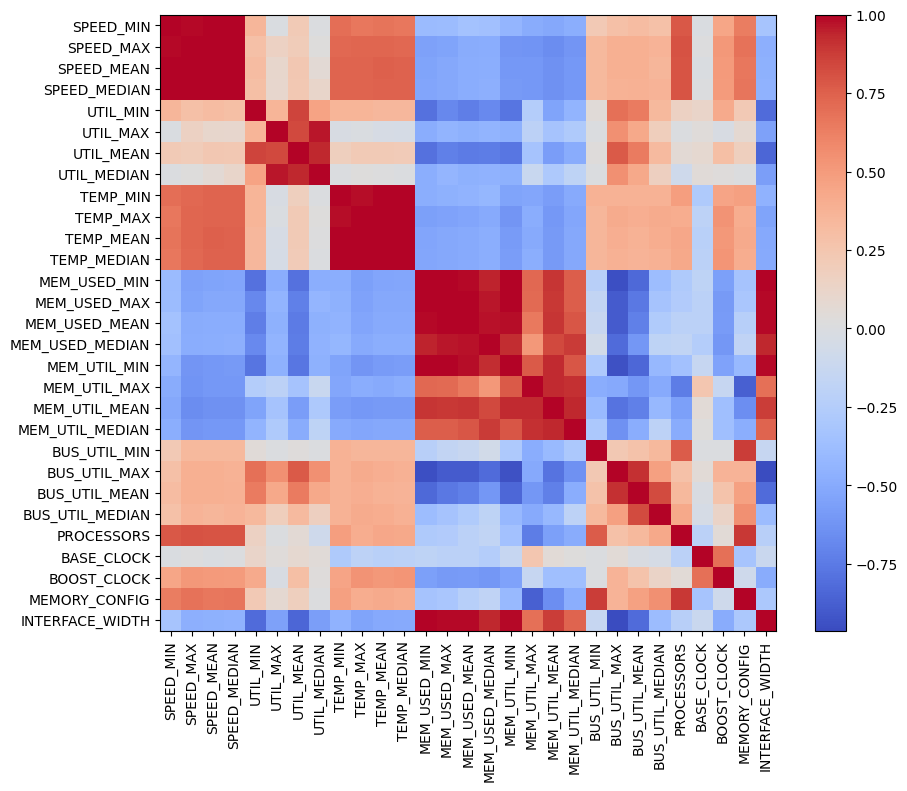

Median Correlation Matrix for CONFIG: dict1


,SPEED_MIN,SPEED_MAX,SPEED_MEAN,SPEED_MEDIAN,UTIL_MIN,UTIL_MAX,UTIL_MEAN,UTIL_MEDIAN,TEMP_MIN,TEMP_MAX,TEMP_MEAN,TEMP_MEDIAN,MEM_USED_MIN,MEM_USED_MAX,MEM_USED_MEAN,MEM_USED_MEDIAN,MEM_UTIL_MIN,MEM_UTIL_MAX,MEM_UTIL_MEAN,MEM_UTIL_MEDIAN,BUS_UTIL_MIN,BUS_UTIL_MAX,BUS_UTIL_MEAN,BUS_UTIL_MEDIAN,PROCESSORS,BASE_CLOCK,BOOST_CLOCK,MEMORY_CONFIG,INTERFACE_WIDTH
SPEED_MIN,1.000000,0.998136,0.999539,0.999648,0.393934,-0.479297,-0.150547,-0.427557,0.247280,0.213168,0.241975,0.233645,-0.701688,-0.478675,-0.589858,-0.485956,-0.755089,-0.321468,-0.573750,-0.516103,0.000000,0.368600,0.276514,0.200989,0.452323,-0.035401,0.413383,0.361083,-0.574434
SPEED_MAX,0.998136,1.000000,0.999660,0.999903,0.401355,-0.467086,-0.115692,-0.459032,0.264232,0.231406,0.255022,0.245629,-0.704404,-0.522197,-0.600421,-0.495042,-0.765008,-0.368864,-0.537500,-0.522170,0.000000,0.369459,0.218310,0.136185,0.455952,-0.039582,0.431148,0.350711,-0.572906
SPEED_MEAN,0.999539,0.999660,1.000000,0.999937,0.395372,-0.470886,-0.125311,-0.460661,0.250610,0.257912,0.286222,0.258840,-0.703254,-0.485146,-0.596588,-0.487785,-0.756369,-0.315478,-0.565890,-0.529020,0.000000,0.368387,0.254244,0.156625,0.447351,-0.032854,0.424553,0.359991,-0.570437
SPEED_MEDIAN,0.999648,0.999903,0.999937,1.000000,0.399792,-0.469475,-0.110155,-0.459337,0.261999,0.231406,0.271268,0.245629,-0.699225,-0.476001,-0.595373,-0.475983,-0.761208,-0.303813,-0.564900,-0.513873,0.000000,0.369673,0.262673,0.174586,0.451343,-0.038073,0.425273,0.360722,-0.571570
UTIL_MIN,0.393934,0.401355,0.395372,0.399792,1.000000,0.000000,0.453115,0.038116,0.000000,0.000000,0.000000,0.000000,-0.812680,-0.398126,-0.498157,-0.426757,-0.728088,0.000000,0.000000,0.000000,0.128636,0.704533,0.678938,0.580769,0.081373,0.186912,0.363291,0.305838,-0.905692
UTIL_MAX,-0.479297,-0.467086,-0.470886,-0.469475,0.000000,1.000000,0.817484,0.866739,-0.146236,-0.159303,-0.154696,-0.158374,0.356868,0.426365,0.441785,0.343357,0.403287,0.340272,0.423841,0.422824,0.000000,0.000000,0.023797,0.000000,-0.098457,0.012075,-0.282028,0.000000,0.140111
UTIL_MEAN,-0.150547,-0.115692,-0.125311,-0.110155,0.453115,0.817484,1.000000,0.935307,0.000000,0.000000,0.000000,0.000000,0.058702,0.364342,0.299578,0.337817,0.051959,0.376969,0.416056,0.336012,0.064953,0.136484,0.252883,0.207939,-0.048520,0.088416,-0.195074,0.037961,0.000000
UTIL_MEDIAN,-0.427557,-0.459032,-0.460661,-0.459337,0.038116,0.866739,0.935307,1.000000,0.000000,0.000000,0.000000,0.000000,0.397263,0.544842,0.471157,0.419829,0.421232,0.386493,0.412781,0.397810,0.046705,0.000000,0.000000,0.000000,-0.154921,0.011377,-0.457765,0.000000,0.227511
TEMP_MIN,0.247280,0.264232,0.250610,0.261999,0.000000,-0.146236,0.000000,0.000000,1.000000,0.996384,0.998885,0.997944,-0.322363,0.000000,0.000000,0.000000,-0.531186,-0.301451,-0.328213,-0.140666,0.000000,0.389386,0.359839,0.351934,0.590254,-0.354301,0.000000,0.823949,0.000000
TEMP_MAX,0.213168,0.231406,0.257912,0.231406,0.000000,-0.159303,0.000000,0.000000,0.996384,1.000000,0.998617,0.997840,-0.273045,0.000000,0.000000,0.031662,-0.482824,-0.297644,-0.277453,-0.100213,0.000000,0.387772,0.354903,0.332551,0.571174,-0.416749,-0.043465,0.824239,0.000000


Correlation matrix shape for CONFIG: dict1 (29, 29)


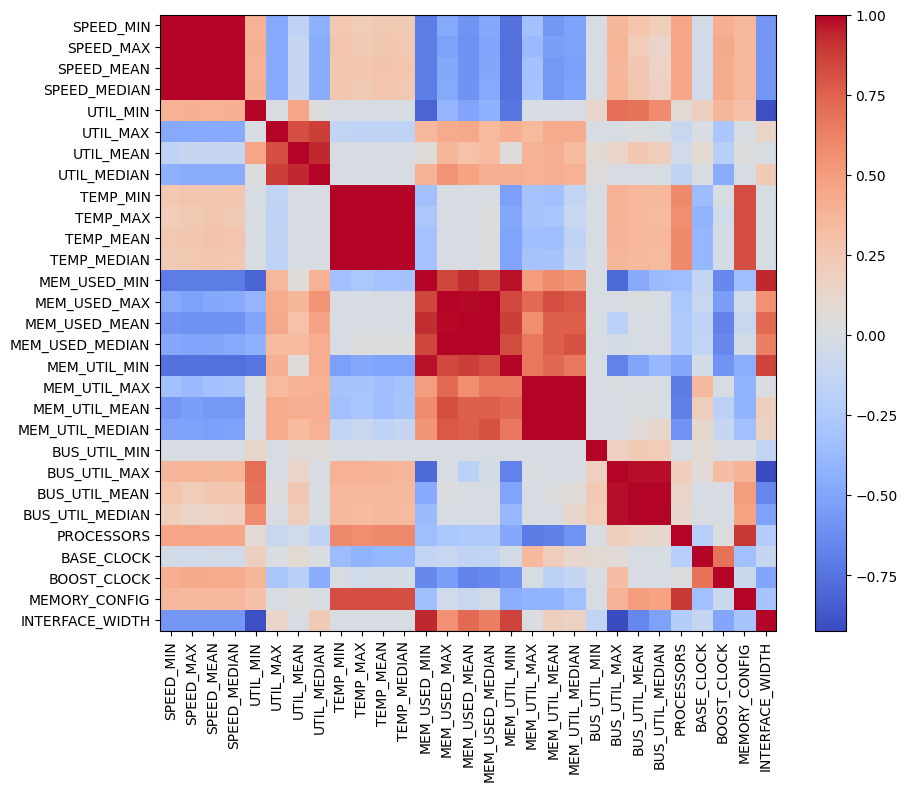

Median Correlation Matrix for CONFIG: dict2


,SPEED_MIN,SPEED_MAX,SPEED_MEAN,SPEED_MEDIAN,UTIL_MIN,UTIL_MAX,UTIL_MEAN,UTIL_MEDIAN,TEMP_MIN,TEMP_MAX,TEMP_MEAN,TEMP_MEDIAN,MEM_USED_MIN,MEM_USED_MAX,MEM_USED_MEAN,MEM_USED_MEDIAN,MEM_UTIL_MIN,MEM_UTIL_MAX,MEM_UTIL_MEAN,MEM_UTIL_MEDIAN,BUS_UTIL_MIN,BUS_UTIL_MAX,BUS_UTIL_MEAN,BUS_UTIL_MEDIAN,PROCESSORS,BASE_CLOCK,BOOST_CLOCK,MEMORY_CONFIG,INTERFACE_WIDTH
SPEED_MIN,1.000000,0.997841,0.999547,0.999618,0.437322,-0.274268,0.000000,-0.140895,0.193578,0.098020,0.149364,0.153267,-0.799386,-0.088574,-0.580244,-0.082568,-0.865858,0.000000,-0.035556,0.000000,0.000000,0.397951,0.328388,0.298039,0.406726,0.000000,0.496937,0.360722,-0.608510
SPEED_MAX,0.997841,1.000000,0.999449,0.999565,0.475110,-0.243048,0.000000,-0.136251,0.113077,0.033080,0.122798,0.120251,-0.796332,-0.033691,-0.579807,-0.067046,-0.872036,0.000000,0.000000,0.000000,0.000000,0.420600,0.351022,0.288800,0.396864,0.000000,0.474922,0.360722,-0.616041
SPEED_MEAN,0.999547,0.999449,1.000000,0.999949,0.453633,-0.253462,0.000000,-0.151249,0.173841,0.098020,0.135926,0.163826,-0.796325,-0.064690,-0.583386,-0.089025,-0.869196,0.000000,-0.023304,0.000000,0.000000,0.407895,0.337815,0.300416,0.406620,0.000000,0.489185,0.360722,-0.606651
SPEED_MEDIAN,0.999618,0.999565,0.999949,1.000000,0.444665,-0.247771,0.000000,-0.152335,0.177602,0.098020,0.143353,0.153379,-0.786916,-0.076715,-0.583475,-0.092517,-0.869156,0.000000,-0.021480,0.000000,0.000000,0.407870,0.333333,0.296347,0.396864,0.000000,0.490010,0.360722,-0.595925
UTIL_MIN,0.437322,0.475110,0.453633,0.444665,1.000000,-0.156200,0.274010,-0.044572,-0.314879,-0.325023,-0.319358,-0.324417,-0.841390,-0.020343,-0.390593,-0.024888,-0.756577,0.074257,0.000000,0.048172,0.000000,0.855387,0.849959,0.828548,0.160036,0.150972,0.396073,0.310969,-0.911335
UTIL_MAX,-0.274268,-0.243048,-0.253462,-0.247771,-0.156200,1.000000,0.791058,0.926001,-0.187860,-0.136140,-0.183180,-0.196225,0.480949,0.270491,0.342854,0.252567,0.519042,0.135925,0.219709,0.124597,0.000000,-0.142099,-0.127191,-0.097488,-0.044575,0.000000,-0.473351,-0.022262,0.354020
UTIL_MEAN,0.000000,0.000000,0.000000,0.000000,0.274010,0.791058,1.000000,0.920017,-0.276453,-0.249991,-0.262172,-0.278697,0.047483,0.327965,0.245689,0.319327,0.078532,0.215023,0.231721,0.197224,0.000000,0.129745,0.127463,0.123481,-0.038083,0.040774,-0.265434,0.053150,0.000000
UTIL_MEDIAN,-0.140895,-0.136251,-0.151249,-0.152335,-0.044572,0.926001,0.920017,1.000000,-0.154811,-0.134704,-0.160597,-0.162618,0.474967,0.392527,0.446891,0.379792,0.488815,0.150373,0.241400,0.123770,0.000000,-0.095260,-0.054727,-0.009622,-0.145995,0.000000,-0.495321,0.000000,0.309687
TEMP_MIN,0.193578,0.113077,0.173841,0.177602,-0.314879,-0.187860,-0.276453,-0.154811,1.000000,0.997822,0.999292,0.998947,0.045041,-0.062143,-0.009635,-0.053514,-0.142217,-0.751847,-0.745756,-0.756433,0.000000,0.000000,-0.068420,-0.063589,0.634397,-0.640602,-0.213166,0.572366,0.334941
TEMP_MAX,0.098020,0.033080,0.098020,0.098020,-0.325023,-0.136140,-0.249991,-0.134704,0.997822,1.000000,0.999094,0.998526,0.062481,-0.022892,0.000000,-0.015889,-0.124879,-0.737476,-0.724803,-0.746913,0.000000,-0.032854,-0.097476,-0.071592,0.630289,-0.665460,-0.257718,0.584011,0.343605


Correlation matrix shape for CONFIG: dict2 (29, 29)


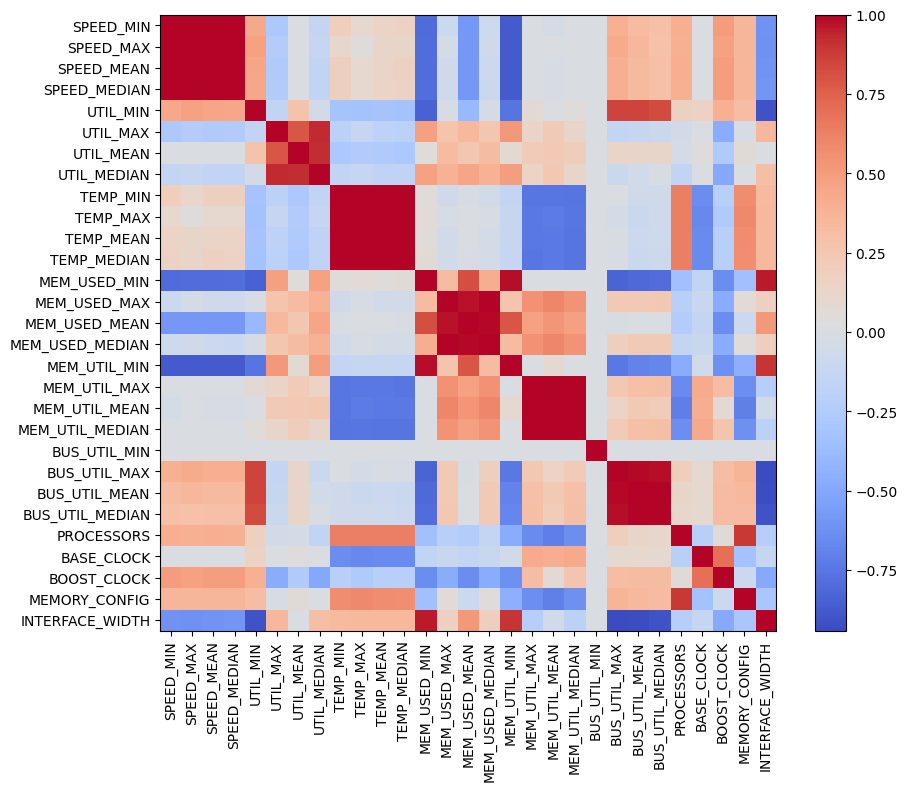

In [6]:
correlations_by_config = {}

# Calculate correlations for each file and store them in the respective CONFIG category
for file in files:
    path = os.path.join(folder, file)
    df = pd.read_csv(path, index_col=False)
    df = add_cols_to_df(df)

    mem_cols = ['MEM_USED_MIN', 'MEM_USED_MAX', 'MEM_USED_MEAN', 'MEM_USED_MEDIAN', 'MEM_UTIL_MIN', 'MEM_UTIL_MAX', 'MEM_UTIL_MEAN', 'MEM_UTIL_MEDIAN', 'BUS_UTIL_MIN', 'BUS_UTIL_MAX', 'BUS_UTIL_MEAN', 'BUS_UTIL_MEDIAN']

    for col in mem_cols:
        for i in range(1, len(df)):
            if pd.isna(df.at[i, col]):
                if df.at[i, 'CONFIG'] == df.at[i - 1, 'CONFIG'] and not pd.isna(df.at[i - 1, col]):
                    df.at[i, col] = df.at[i - 1, col]
                else:
                    df.at[i, col] = df.at[i - 1, col]
    
    # Group by "CONFIG" column
    grouped_configs = df.groupby("CONFIG")

    for config, df_group in grouped_configs:
        df_to_corr = df_group.iloc[:, 2:]
        matrix = df_to_corr.corr()
        correlations_by_config.setdefault(config, []).append(matrix)

# Compute the median correlation for each CONFIG category
median_correlations_by_config = {}
for config, corr_list in correlations_by_config.items():
    if corr_list:
        correlations_with_zeros = np.nan_to_num(np.stack(corr_list), nan=0)
        median_corr = np.median(correlations_with_zeros, axis=0)
        median_correlations_by_config[config] = median_corr

# Display both median correlation matrices and their corresponding plots
for config, median_corr in median_correlations_by_config.items():
    median_corr_df = pd.DataFrame(median_corr, columns=df.columns[2:], index=df.columns[2:])

    print(f"Median Correlation Matrix for CONFIG: {config}")
    display(median_corr_df.style.background_gradient(cmap='coolwarm'))

    print(f"Correlation matrix shape for CONFIG: {config}", median_corr.shape)

    plt.figure(figsize=(10, 8))
    plt.imshow(median_corr, cmap='coolwarm', interpolation='nearest')
    plt.colorbar()
    plt.xticks(np.arange(len(df.columns[2:])), df.columns[2:], rotation=90)
    plt.yticks(np.arange(len(df.columns[2:])), df.columns[2:])
    plt.title(f'Median Correlation Matrix for CONFIG: {config}')
    plt.show()
